# Analiza podatkov

## Tukaj bo praviloma analiza podatkov

Za zdaj šele dodajam datoteke

Knižnice

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import funkcije


Tukaj dobimo podatke

In [123]:
podatki = pd.read_csv("godot.csv",on_bad_lines="skip",delimiter=";")
podatki = podatki.dropna().convert_dtypes({"id":int})
podatki

,id,ime,link,app_type,cena,discount,release_date,developer,publisher,all_reviews,genre,achievements,description
0,1942280,Brotato,https://store.steampowered.com/app/1942280/Bro...,Game,"4,99€","('25%', '3,74€')","23 Jun, 2023",Blobfish,Blobfish,"('Overwhelmingly Positive', '74,353', '97%')","('Action', 'Casual', 'Indie', 'RPG')",83,Brotato is a top-down arena shooter roguelite ...
1,1677770,The Case of the Golden Idol,https://store.steampowered.com/app/1677770/The...,Game,"17,99€",No discount,"13 Oct, 2022",Color Gray Games,Playstack,"('Overwhelmingly Positive', '6,104', '98%')","('Adventure', 'Indie')",17,A new kind of detective game that allows you t...
2,2570630,20 Small Mazes,https://store.steampowered.com/app/2570630/20_...,Game,Free,No discount,"16 Feb, 2024",FLEB,FLEB,"('Overwhelmingly Positive', '5,261', '98%')","('Adventure', 'Casual', 'Indie')",1,This is a puzzle game with twenty small mazes....
3,1713610,Purrgatory,https://store.steampowered.com/app/1713610/Pur...,Game,Free,No discount,"22 Aug, 2021",Niv (Darvin Heo),Niv (Darvin Heo),"('Overwhelmingly Positive', '4,107', '99%')","('Adventure', 'Casual', 'Free To Play', 'Indie')",No achievements,A slice-of-death visual novel about making fri...
4,1507970,Word Game: Episode 0,https://store.steampowered.com/app/1507970/Wor...,Game,Free,No discount,"14 Jan, 2021",Team9,Team9,"('Overwhelmingly Positive', '4,514', '98%')","('Adventure', 'Indie', 'RPG', 'Strategy')",No achievements,Word game is literally a game of words. Player...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2498570,Canvas of Kings,https://store.steampowered.com/app/2498570/Can...,Game,"18,49€","('20%', '14,79€')","3 Aug, 2023",Hannes Breuer,Hannes Breuer,"('Very Positive', '272', '94%')","('Indie', 'RPG', 'Early Access')",1,Canvas of Kings is a minimalistic mapmaking to...
2306,3084510,Toonie Tennis,https://store.steampowered.com/app/3084510/Too...,Game,"12,79€",No discount,"28 Jul, 2024",Ravi Gyani,Ravi Gyani,No reviews,"('Casual', 'Indie', 'Sports', 'Early Access')",No achievements,"Serve, Smash, Slice, Volley in the ultimate ar..."
2307,3091200,Cricket Legends,https://store.steampowered.com/app/3091200/Cri...,Game,"10,79€",No discount,"28 Jul, 2024",Ravi Gyani,Ravi Gyani,No reviews,"('Simulation', 'Sports', 'Early Access')",No achievements,"Simple to play, but Difficult to master authen..."
2308,3084100,Depth Ascend,https://store.steampowered.com/app/3084100/Dep...,Game,Free,No discount,Coming soon,Julián Ochando,Julian Ochando,No reviews,"('Action', 'Casual', 'Indie', 'Racing')",No achievements,"Embark on an epic race for your survival, feed..."


In [17]:
on_sale = podatki[podatki["discount"]!="No discount"]
on_sale[["ime","cena","discount"]]

,ime,cena,discount
0,Brotato,"4,99€","('25%', '3,74€')"
13,Path of Achra,"9,75€","('25%', '7,31€')"
42,Ex-Zodiac,"8,99€","('45%', '4,94€')"
76,Canvas of Kings,"18,49€","('20%', '14,79€')"
113,Chess Survivors,"4,99€","('50%', '2,49€')"
...,...,...,...
2216,Bella Wants Blood,"4,99€","('10%', '4,49€')"
2222,Malware,"2,99€","('20%', '2,39€')"
2294,TOiLET,"1,99€","('20%', '1,59€')"
2295,Beauty Riddle,"0,99€","('30%', '0,69€')"


In [14]:
zastonj = podatki[podatki["cena"]=="Free"]
zastonj[["ime"]]

,ime
2,20 Small Mazes
3,Purrgatory
4,Word Game: Episode 0
6,Virtual Cottage
9,Psychopomp
...,...
2302,Lost Resolve
2303,Goblington
2304,Supurr Cat Cafe: Sandwich Rush
2308,Depth Ascend


<Axes: xlabel='Release date'>

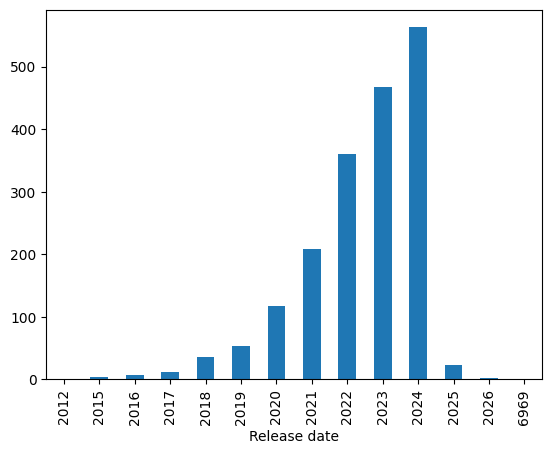

In [107]:
def leto(niz):
    try:
        return int(niz[-4:])
    except:
        return 0

datumi = podatki.copy()
datumi["release_date"] = datumi["release_date"].apply(leto)
datumi = datumi[datumi["release_date"] != 0]
datumi.groupby("release_date").size().plot.bar(xlabel="Release date")


{'Action': 896, 'Casual': 922, 'Indie': 1574, 'RPG': 320, 'Adventure': 648, 'Free To Play': 166, 'Strategy': 470, 'Simulation': 298, 'Early Access': 264, 'Animation & Modeling': 7, 'Design & Illustration': 11, 'Game Development': 10, 'Massively Multiplayer': 24, 'Racing': 63, 'Utilities': 9, 'Software Training': 1, 'Sports': 59, 'Education': 2, 'Video Production': 1, '': 2, 'Photo Editing': 1}


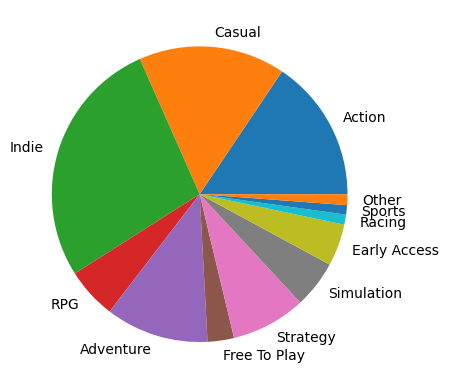

In [151]:
slovar = {}
def dodaj_v_slovar(seznam,slovar):
    for skoraj_zanr in seznam[1:-1].split(", "):
        zanr = skoraj_zanr.replace("'","").replace(",","")
        if zanr in slovar:
            slovar[zanr] += 1
        else:
            slovar[zanr] = 1

podatki["genre"].apply(lambda x: dodaj_v_slovar(x,slovar))
print(slovar)
Other = 0
odstrani = []
for key,item in slovar.items():
    if item < 50:
        Other += item
        odstrani.append(key)
for i in odstrani:
    del slovar[i]
slovar["Other"] = Other

plt.pie(slovar.values(), labels=slovar.keys())
plt.show()

In [157]:
ne_igre = podatki[podatki["app_type"] != "Game"]
ne_igre[["ime","app_type"]]

,ime,app_type
77,RPG in a Box,Software
152,PNGTuber Plus,Software
153,Tree It,Software
215,PixelOver,Software
416,Kinetic Anatomy 3D,Software
600,MOR...E TRAINER (Learning Morse Code),Software
650,Cauldron Caution Demo,Demo
746,BlastFX,Software
834,The Void Project Demo,Demo
845,ColorTool,Software
